In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches


import matplotlib.image as mpimg

In [7]:
## Creer votre propre Type de données abstrait Couleur sous python avec les caractériistiques suivants:
class Couleur:
    '''
    Constructeur à 3 paramétres qui represente les valeurs entiéres des différentes couleurs
    '''
    def __init__(self, R, G,B,name = None):
        self.R=R
        self.G=G
        self.B=B
        if self.R > 255:
            self.R=255
        if self.G > 255:
            self.G=255
        if self.B > 255:
            self.B = 255
        if self.R < 0:
            self.R=0
        if self.G < 0:
            self.G=0
        if self.B < 0:
            self.B = 0
        
    '''
    Creer une couleur à partir d'une liste
    '''
    @staticmethod
    def creerCouleur(listeRGB):
        Red=listeRGB[0]
        Green=listeRGB[1]
        Blue=listeRGB[2]
        if Red > 255:
            Red=255
        if Green > 255:
            Green=255
        if Blue > 255:
            Blue = 255
        if Red < 0:
            Red=0
        if Green < 0:
            Green=0
        if Blue < 0:
            Blue = 0
        return Couleur(Red, Green, Blue)
            
    
    '''
    Recupération de l'intensite de la couleur rouge
    '''
    def getR(self):
        return self.R
    '''
    Recupération de l'intensite de la couleur verte
    '''
    def getG(self):
        return self.G
    '''
    Recupération de l'intensite de la couleur verte
    '''
    def getB(self):
        return self.B
    '''
    Version brillante de cet objet couleur
    Il faut caculer le meme pourcentage de R,G,B
    Ajouter ces valeurs aux valeurs R,G,B de l'objet couleur originel
    Retourne un objet couleur
    '''
    def brighter(self,pourcentage):
        self.R+=pourcentage
        self.G+=pourcentage
        self.B+=pourcentage
        if self.R > 255:
            self.R=255
        if self.G > 255:
            self.G=255
        if self.B > 255:
            self.B = 255
        if self.R < 0:
            self.R=0
        if self.G < 0:
            self.G=0
        if self.B < 0:
            self.B = 0
        return self
    '''
    Version sombre de cet objet couleur
    
    Il suffit de multiplier toutes les composantes R, G, B par le pourcentage passé en paramétre
    
    https://graphicdesign.stackexchange.com/questions/75417/how-to-make-a-given-color-a-bit-darker-or-lighter
    
    Retourne un objet couleur
    '''
    def darker(self,pourcentage):
        self.R*=pourcentage
        self.G*=pourcentage
        self.B*=pourcentage
        if self.R > 255:
            self.R=255
        if self.G > 255:
            self.G=255
        if self.B > 255:
            self.B = 255
        if self.R < 0:
            self.R=0
        if self.G < 0:
            self.G=0
        if self.B < 0:
            self.B = 0
        return self
    '''
    Chaine de caractére representant cet objet couleur
    Retourne un string contenant les valeurs des composantes R,G,B
    '''
    def toString(self):
        return "RGB("+str(self.R)+","+str(self.G)+","+str(self.B)+")"
    '''
    Comparaison de cet objet couleur avec color
    Retourne un booloean
    '''
    def equals(self,color):
        return self.getR() == color.getR() and self.getG() == color.getG() and self.getB() == color.getB()
    '''
     Calcul de la Luminance. La qualité des 
     images dans les écrans plasmas modernes est une combinaison linéaire des trois couleurs et est définie par
     l'equation Y = 0.299r + 0.587g + 0.114b
     
    '''
    def luminance(self):
        return 0.299*self.R + 0.587*self.G + 0.114*self.B
    '''
     Calcul du niveau de gris. Il faut remplacer chaque intensité de couleur par la valeur entiére de la luminance.
     Il faudra créer une nouvelle couleur avec des intensités égales à la luminance
    '''
    def grayScale(self):
        self.R=int(self.luminance())
        self.G=int(self.luminance())
        self.B=int(self.luminance())
        return self
    '''
     Compatibilité deux couleurs. Deux couleurs sont compatibles si la différence de leur luminance fait au moins 128
     Retourne un boolean qui vaut true si les deux couleurs sont compatibles et false sinon
    '''
    def compatible(self, couleur):
        if (self.luminance()-couleur.luminance()<=128) or (self.luminance()-couleur.luminance()>=128) :
            return True
        else:
            return False
    '''
     Addition de couleur
    '''
    def add(self, col):
        Red=self.R+col.R
        Green=self.G+col.G
        Blue=self.B+col.B
        if Red > 255:
            Red=255
        if Green > 255:
            Green=255
        if Blue > 255:
            Blue = 255
        return Couleur(Red, Green, Blue)
    '''
    Fonction permettant d'afficher une couleur dans un cercle. Vous pouvez l'utiliser.
    '''
    def showColor(self):
        fig, ax = plt.subplots()
        # create a grid to plot the color
        grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T
        # add a circle
        circle = mpatches.Circle(grid[0], 0.05, ec="none",color=(self.R/255,self.G/255,self.B/255))
        ax.add_patch(circle)
        #ax.add_line(line)

        plt.axis('equal')
        plt.axis('off')
        plt.tight_layout()

        plt.show()

Creer boule de couleur: 


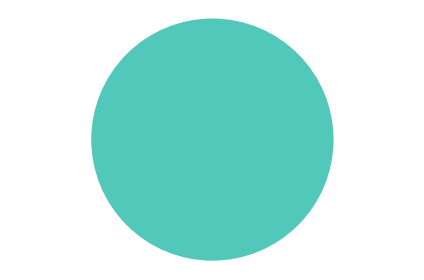

Brighter: 


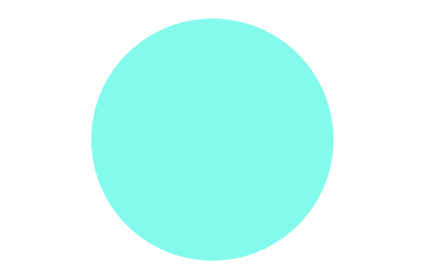

Darker: 


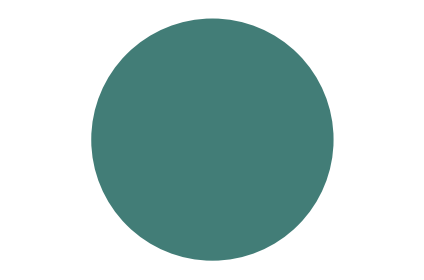

GrayScale: 


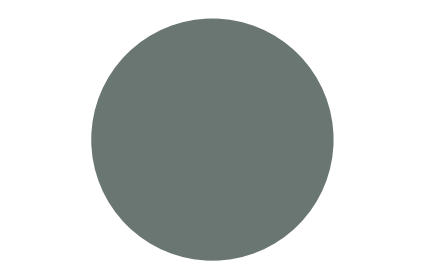

Creer nouvelle couleur: 


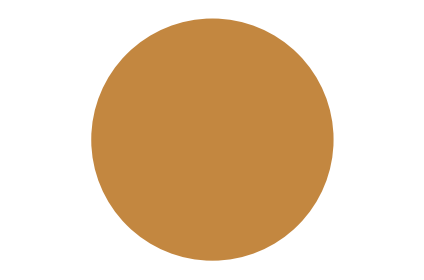

Add: RGB(106,118,114) + RGB(110,50,129)


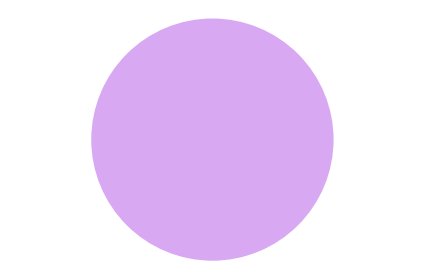

Compatibilité de RGB(106,118,114) et RGB(10,30,252) : True
Egalité de RGB(106,118,114) et RGB(10,20,30): False


In [3]:
col=Couleur(82,200,187)
print("Creer boule de couleur: ")
col.showColor()
brighter=col.brighter(50)
print("Brighter: ")
brighter.showColor()
darker=col.darker(0.5)
print("Darker: ")
darker.showColor()
grayScale=col.grayScale()
print("GrayScale: ")
grayScale.showColor()
creer=Couleur.creerCouleur([195,135,64])
print("Creer nouvelle couleur: ")
creer.showColor()
col4=Couleur(110,50,129)
add=col.add(col4)
print(f"Add: {grayScale.toString()} + {col4.toString()}")
add.showColor()
col3=Couleur(10,30,252)
compatible=col.compatible(col3)
print(f"Compatibilité de {col.toString()} et {col3.toString()} : {compatible}")
col2=Couleur(10,20,30)
equals=col.equals(col2)
print(f"Egalité de {col.toString()} et {col2.toString()}: {equals}")
string=col.toString()
#print(f"Couleur en string: {string}")
#print(add.toString())


In [8]:
## Image Processing
class Picture:
    '''
    Creer une image à partir d'un fichier en utilisant la fonction imread() de matplotlig.image ou plus généralement la 
    librairie Pillow
    '''
    def __init__(self,nomFichier = None,H = None, W = None):
        if nomFichier == None:
                
            '''
            Creer une image blanche de hauteur H et de largeur W
            '''
            self.H = H
            self.W = W
            self.img = np.zeros((H,W,3))
        else:
                
            '''
            Creer une image à partir d'un fichier
            '''
            self.img = mpimg.imread(nomFichier)
            self.H = self.img.shape[1]
            self.W = self.img.shape[0]
        
    
    '''
    Retourne la hauteur H
    '''
    def getH(self):
        return self.H
    '''
    Retourne la largeur W
    '''
    def getW(self):
        return self.W
    '''
    Retourne le tableau numpy constituant l'image
    '''
    def getImg(self):
        return self.img
    '''
    Retourne les couleurs R,G, B sous forme de liste du pixel à la ligne row et la colonne col
    '''
    def getCouleur(self,row, col):
        Couleur.R=self.img[row,col,0]
        Couleur.G=self.img[row,col,1]
        Couleur.B=self.img[row,col,2]
        liste=[Couleur.R, Couleur.G, Couleur.B]
        return Couleur(Couleur.R, Couleur.G, Couleur.B)
         
    '''
    Modifie les couleurs R,G,B du pixel à la ligne row et la colonne col
    '''
    def setCouleur(self,row, col,couleur):
        self.img[row,col,:3]=couleur
        return self.img
        
        
    '''
    Affiche une image
    '''
    def affiche(self):
        plt.imshow(self.img)
    '''
    Sauve  une image dans un fichier png
    '''
    def save(self, nomFichier):
        
        plt.imsave(nomFichier, self.img, format = 'png')
    
    
    
    

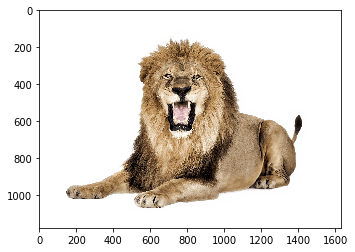

In [15]:
image=Picture("gainde.png")
image.affiche()

In [9]:
## Image processing
class ImageProcessing:
    
    def __init__(self,image):
        self.image = image
    '''
    Helper function
    '''
    def __calGray__(listePixel):
        A = math.floor(0.299*listePixel[0] + 0.587*listePixel[1] + 0.114*listePixel[2])
        return np.ndarray([A,A,A])
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Appliquer les fonctions map, reduce ou filter pour reduire la complexite
    '''
    def transformGrayscaleMap(self):
        grayPicture = Picture(None,self.image.W,self.image.H)
        grayPicture.image = map(self.__calGray__,self.image.img[:,:])
        return grayPicture
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Une classe gloutonne avec des boucles for
    '''
    def transformGrayscaleGlouton(self):
        normal=self.image
        imgGray=Picture(None, self.image.W, self.image.H)
        for row in range(normal.W):
            for col in range(normal.H):
                couleur=normal.getCouleur(row,col)
                A=couleur.luminance()
                couleur.grayScale()
                imgGray.setCouleur(row,col,[A,A,A])
        plt.subplot(1,2,1)
        normal.affiche()
        plt.axis("off")
        plt.title("Image Originale")
        plt.subplot(1,2,2)
        imgGray.affiche()
        plt.axis("off")
        plt.title("En noir et blanc")
                 
        
    '''
     Creer une image en inversant les proportions de l'image source. Afficher les deux images
    '''
    def transformScale(self):
        normal=self.image
        ImgInverse=Picture(None, self.image.H, self.image.W)
        for row in range(normal.W):
            for col in range(normal.H):
                newCol=int(row*normal.H/normal.W)
                newRow=int(col*normal.W/normal.H)
                couleur=normal.getCouleur(newRow, newCol)
                r=normal.img[newRow, newCol, 0]
                g=normal.img[newRow, newCol, 1]
                b=normal.img[newRow, newCol, 2]
                color=[r,g,b]
                ImgInverse.setCouleur(col, row, color)
        plt.subplot(1,2,1)
        normal.affiche()
        plt.title("Image Originale")
        plt.subplot(1,2,2)
        ImgInverse.affiche()
        plt.title("Image Inverse")
    '''
    Separer les couleurs d'une image et visualiser les trois couleurs
    '''
    def separerCouleur(self):
        normal=self.image
        imageR=Picture(None, self.image.W, self.image.H)
        imageG=Picture(None, self.image.W, self.image.H)
        imageB=Picture(None, self.image.W, self.image.H)
        for row in range(normal.W):
            for col in range(normal.H):
                couleur=normal.getCouleur(row,col)
                r=couleur.getR()
                g=couleur.getG()
                b=couleur.getB()
                imageR.setCouleur(row,col,[r,0,0])
                imageG.setCouleur(row,col,[0,g,0])
                imageB.setCouleur(row,col,[0,0,b])
        
        plt.subplot(1,3,1)
        imageR.affiche()
        plt.axis("off")
        plt.title("Image en rouge")
        plt.subplot(1,3,2)
        imageG.affiche()
        plt.axis("off")
        plt.title("Image en vert")
        plt.subplot(1,3,3)
        imageB.affiche()
        plt.axis("off")
        plt.title("Image en bleu")
    '''
    Filtre de glace: Affecter à chaque pixel p la couleur d'un pixel voisin choisi alétoirement
    (Les coordonnées du pixel et de p doivent différer d'au plus 5).
    Afficher les deux images 
    '''
    def filtreGlass(self):
        normal=self.image
        glass=Picture(None, self.image.W, self.image.H)
        for row in range(normal.H):
            for col in range(normal.W):
                rowG=(normal.W + col +random.randint(-4,4))%normal.W
                colG=(normal.H + row +random.randint(-4,4))%normal.H
                couleur=normal.getCouleur(rowG,colG)
                r=normal.img[rowG, colG, 0]
                g=normal.img[rowG, colG, 1]
                b=normal.img[rowG, colG, 2]
                color=[r,g,b]
                glass.setCouleur(col,row, color)
        plt.subplot(1,2,1)
        normal.affiche()
        plt.axis("off")
        plt.title("Image Originale")
        plt.subplot(1,2,2)
        glass.affiche()
        plt.axis("off")
        plt.title("Glass Filter")
                
    '''
    Filtre moyenneur/Mean Filter
    On remplace une valeur par la moyenne des 9 valeurs qui l'entourent(elle incluse)
    '''
    def filtreMoyen(self):
        normal=self.image
        fmoyen=Picture(None, self.image.W, self.image.H)
        for row in range(normal.H):
            for col in range(normal.W):
                somme=0
                for a in range(row-2, row+1):
                    for b in range(col-2, col+1):
                        somme+=self.image.img[b,a]
                moy=somme/9
                color=moy
                fmoyen.setCouleur(col,row, color)
        plt.subplot(1,2,1)
        normal.affiche()
        plt.axis("off")
        plt.title("Image Originale")
        plt.subplot(1,2,2)
        fmoyen.affiche()
        plt.axis("off")
        plt.title("Mean Filter")
    '''
    Filtre median/ Median filter
    On supprime les valeurs aberrantes
    On remplace une valeur par la médiane des 9 valeurs qui l'entourent.
    '''
    def filtreMedian(self):
        normal=self.image
        fmedian=Picture(None, self.image.W, self.image.H)
        for row in range(normal.H):
            for col in range(normal.W):
                red=[]
                green=[]
                blue=[]
                for b in range(row-2, row+1):
                    for a in range(col-2, col+1):
                        red.append(self.image.img[a,b,0])
                        green.append(self.image.img[a,b,1])
                        blue.append(self.image.img[a,b,2])
                red.sort()
                green.sort()
                blue.sort()
                color=[red[4], green[4], blue[4]]
                fmedian.setCouleur(col,row, color)
        plt.subplot(1,2,1)
        normal.affiche()
        plt.axis("off")
        plt.title("Image Originale")
        plt.subplot(1,2,2)
        fmedian.affiche()
        plt.axis("off")
        plt.title("Median Filter")
        fmedian.save('median.png')
    '''
    Lissage Gaussien/Gaussian Smoothing (filtre de bruit)
    Avec filtre 5*5
    Noyau ou Kernel= (1/(2*pi* sigma^2))e(-(x^2 + y^2)/2*sigma^2)
    Ensuite on fait la convolution : I2(i,j)=somme(k=0,l=2)somme(l=0,l=2)I1(i+1-k, j+1-l)K(k,l)
    '''
    def gaussien(self, sigma):
        normal=self.image
        gauss=Picture(None, normal.W, normal.H)
        #Construire un Kernel 5*5
        noyau=np.zeros((5,5))
        m=5//2
        n=5//2
        for x in range(-m, m+1):
            for y in range (-n, n+1):
                x1=2*math.pi*sigma**2
                x2=math.exp(-(x**2 + y**2)/ (2*sigma**2))
                noyau[x+m, y+n]=(1/x1)*x2
        #Calcul convolution
        #print(noyau)
        for row in range(normal.H):
            for col in range(normal.W):
                j=0
                r=0
                g=0
                b=0
                for i in range(1,5):
                    j+=1
                    Row= row-i+1
                    Col=col-j+1
                    r+=self.image.img[Col, Row, 0]*noyau[i,j]
                    g+=self.image.img[Col, Row, 1]*noyau[i,j]
                    b+=self.image.img[Col, Row, 2]*noyau[i,j]
                    color=[r, g, b]
                    gauss.setCouleur(Col, Row, color)
        #print(gauss.img)
        plt.subplot(1,2,1)
        normal.affiche()
        plt.axis("off")
        plt.title("Image Originale")
        plt.subplot(1,2,2)
        gauss.affiche()
        plt.axis("off")
        plt.title("Gaussian Smoothing")
        gauss.save("Gauss.png")#Pour ensuite faire un filtre flou
    '''
    Lissage Conservateur/Conservative smoothing
    '''
    def conservateur(self):
        normal=self.image
        conserve=Picture(None, self.image.W, self.image.H)
        for row in range(normal.H):
            for col in range(normal.W):
                red=[]
                green=[]
                blue=[]
                for b in range(row-2, row+1):
                    for a in range(col-2, col+1):
                        red.append(self.image.img[a,b,0])
                        green.append(self.image.img[a,b,1])
                        blue.append(self.image.img[a,b,2])
                j=red[4]
                k=green[4]
                l=blue[4]
                red.sort()
                green.sort()
                blue.sort()
                if j>red[-1]:
                    j=red[-1]
                if j<red[0]:
                    j=red[0]
                if k>green[-1]:
                    k=green[-1]
                if k<green[0]:
                    k=green[0]
                if l>blue[-1]:
                    l=blue[-1]
                if l<blue[0]:
                    l=blue[0]
                color=[j, k, l]
                conserve.setCouleur(col,row, color)
        #print(conserve.img)
        plt.subplot(1,2,1)
        normal.affiche()
        plt.axis("off")
        plt.title("Image Originale")
        plt.subplot(1,2,2)
        conserve.affiche()
        plt.axis("off")
        plt.title("Conservative smoothing")
    '''
    Crimmins Speckle Removal
    '''
    def CrimminsSpeckleRemoval(self):
        pass
    '''
     Filtres de fréquence/Frequency filters
    '''
    def frequence(self):
        pass
    '''
    Laplacian (Détection de bord)
    Avec filtre 7*7
    Noyau ou Kernel= (-1/(pi*sigma**4))(1-((x**2+y**2)/2*sigma**2))(e(-(x**2+y**2)/2*sigma**2))
    Ensuite on fait la convolution : I2(i,j)=somme(k=0,k=2)somme(l=0,l=2)I1(i+1-k, j+1-l)K(k,l)
    '''
    def laplacian(self, sigma):
        normal=self.image
        laplace=Picture(None, normal.W, normal.H)
        #Construire un Kernel 5*5
        noyau=np.zeros((7,7))
        m=7//2
        n=7//2
        for x in range(-m, m+1):
            for y in range (-n, n+1):
                x1=(x**2+y**2)/(2* sigma**2)
                x2=math.exp(-(x**2 + y**2)/ (2*sigma**2))
                noyau[x+m, y+n]=(1/(math.pi * sigma**4))*(1-x1)*x2
        #Calcul convolution
        #print(noyau)
        for row in range(normal.H):
            for col in range(normal.W):
                j=0
                r=0
                g=0
                b=0
                for i in range(1,7):
                    j+=1
                    Row= row+1-i
                    Col=col+1-j
                    r+=self.image.img[Col, Row, 0]*noyau[i,j]
                    g+=self.image.img[Col, Row, 1]*noyau[i,j]
                    b+=self.image.img[Col, Row, 2]*noyau[i,j]
                    color=[r,g,b]
                    laplace.setCouleur(Col, Row, color)
        #print(laplace.img)
        plt.subplot(1,2,1)
        normal.affiche()
        plt.axis("off")
        plt.title("Image Originale")
        plt.subplot(1,2,2)
        laplace.affiche()
        plt.axis("off")
        plt.title("Laplacian")
    '''
    Filtre Flou / Unsharp filter
    '''
    def flou(self):
        normal=self.image
        gauss=ImageProcessing(Picture("median.png"))
        flou=Picture(None, self.image.W, self.image.H)
        for row in range(normal.W):
            for col in range(normal.H):
                """rowG=(normal.W - gauss.image.W+1)
                colG=(normal.H - gauss.image.H+1)"""
                couleur=normal.getCouleur(row,col)
                r=normal.img[row, col, 0] - gauss.image.img[row, col, 0]
                g=normal.img[row, col, 1] - gauss.image.img[row, col, 1]
                b=normal.img[row, col, 2] - gauss.image.img[row, col, 2]
                color=[r,g,b]
                flou.setCouleur(row,col, color)
        plt.subplot(1,2,1)
        normal.affiche()
        plt.axis("off")
        plt.title("Image Originale")
        plt.subplot(1,2,2)
        flou.affiche()
        plt.axis("off")
        plt.title("Unsharp Filter")

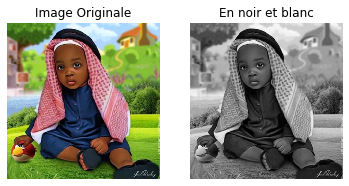

In [162]:
gris=ImageProcessing(Picture('enfant.png'))
gris.transformGrayscaleGlouton()

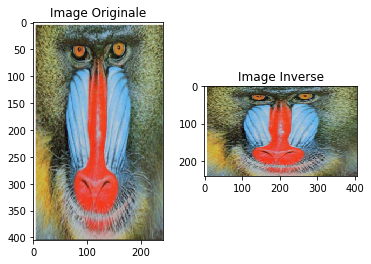

In [13]:
inverse=ImageProcessing(Picture("golo1.png"))
inverse.transformScale()

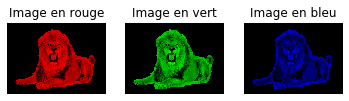

In [12]:
rgb=ImageProcessing(Picture('gainde.png'))
rgb.separerCouleur()

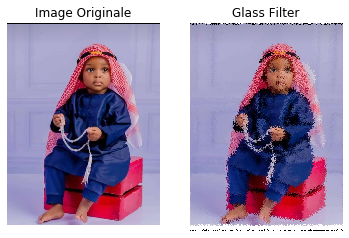

In [34]:
glass=ImageProcessing(Picture("enfant2.png"))
glass.filtreGlass()

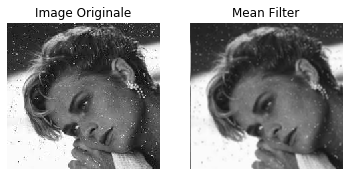

In [13]:
moyen=ImageProcessing(Picture('images.png'))
moyen.filtreMoyen()

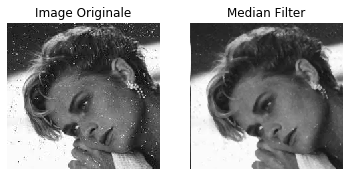

In [15]:
median=ImageProcessing(Picture('images.png'))
median.filtreMedian()

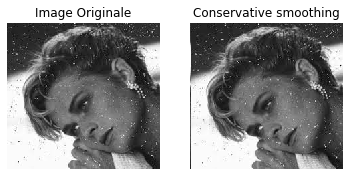

In [17]:
conserve=ImageProcessing(Picture('images.png'))
conserve.conservateur()

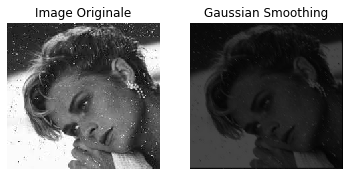

In [11]:
gauss=ImageProcessing(Picture("images.png"))
gauss.gaussien(1) #Ecart-type=1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


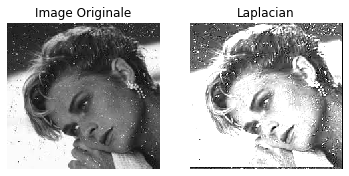

In [114]:
laplace=ImageProcessing(Picture("images.png"))
laplace.laplacian(0.585) #Ecart-type=0.585

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


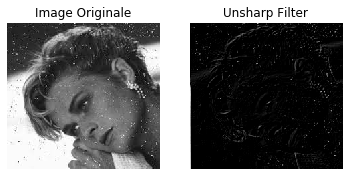

In [23]:
flou=ImageProcessing(Picture("images.png"))
flou.flou() #En utilisant la mediane

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


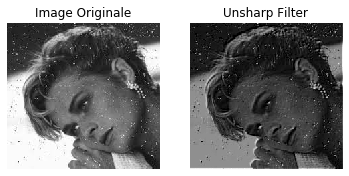

In [10]:
flou=ImageProcessing(Picture("images.png"))
flou.flou() #En utilisant le gaussien